In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
seasons = pd.read_csv('../data/player_stats/player_stats_career.csv')
points = pd.read_csv('../data/player_stats/player_stats_seasons_points.csv')
possessions = pd.read_csv('../data/player_stats/player_stats_seasons_possessions.csv')
minutes = pd.read_csv('../data/player_stats/player_stats_seasons_minutes.csv')
games = pd.read_csv('../data/player_stats/players_stats_seasons_games.csv')

To explore: 
- [ ] 
- [ ] 

To model:
- [ ] Who's more likely to blow up
- [ ] Predict Player statistic based on year in the league (season, per game, points, possessions)
- [ ] 

In [4]:
# change columns names and concat df: seasons, points, possessions, minutes
col_not_to_refractor = ['season', 'playerID', 'name']


# get_new_columns_dict(seasons, 'per season')

def get_new_columns_dict(df, suffix):
    new_col_dict = {}
    for col in df.columns:
        if col not in col_not_to_refractor:
            new_col_dict.update({col: f'{col} {suffix}'})
    return new_col_dict

seasons_refrac = seasons.rename(columns = get_new_columns_dict(seasons, 'per season'))
points_refrac = seasons.rename(columns = get_new_columns_dict(points, 'per 10 points'))
possessions_refrac = seasons.rename(columns = get_new_columns_dict(possessions, 'per 10 posessions'))
minutes_refrac = seasons.rename(columns = get_new_columns_dict(minutes, 'per 100 min'))


In [5]:
# join by season, playerID and name
frames = [seasons_refrac, points_refrac, possessions_refrac, minutes_refrac]
df_agg = pd.concat(frames, keys=col_not_to_refractor)

In [6]:
df_agg.columns

Index(['playerID', 'name', 'gamesPlayed per season', 'scores per season',
       'assists per season', 'goals per season', 'plusMinus per season',
       'completions per season', 'completionPercentage per season',
       'hockeyAssists per season', 'throwaways per season',
       'stalls per season', 'drops per season', 'blocks per season',
       'callahans per season', 'pulls per season', 'teams per season',
       'season', 'pointsPlayed per season', 'oPointsPlayed per season',
       'dPointsPlayed per season', 'minutesPlayed per season',
       'possessions per season', 'oEfficiency per season',
       'yardsTotal per season', 'yardsThrown per season',
       'yardsReceived per season', 'hucksCompleted per season',
       'huckPercentage per season', 'gamesPlayed per 10 points',
       'scores per 10 points', 'assists per 10 points', 'goals per 10 points',
       'plusMinus per 10 points', 'completions per 10 points',
       'completionPercentage per 10 points', 'hockeyAssists pe

In [7]:
# drop all columns with 'yard' or 'huck' because empty
col_to_drops = [col for col in df_agg.columns if 'yard' in col or 'huck' in col]
df_clean = df_agg.drop(columns=col_to_drops, axis=1)
df_clean

playerID               name  gamesPlayed per season  \
season 0       jhelton    Jonathan Helton                    16.0   
       1       jkorber        John Korber                    12.0   
       2       smurray        Sean Murray                    16.0   
       3        cbrock      Cameron Brock                    16.0   
       4      rdulabon        Rob Dulabon                    15.0   
...                ...                ...                     ...   
name   5584     tkunsa        Tyler Kunsa                     NaN   
       5585     jclyde         John Clyde                     NaN   
       5586       sfil        Sawyer  Fil                     NaN   
       5587  dtravagli  Dustin Travaglini                     NaN   
       5588     dinnis        David Innis                     NaN   

             scores per season  assists per season  goals per season  \
season 0                  98.0                64.0              34.0   
       1                  87.0                19.0              68.0   
       2                  70.0                27.0              43.0   
       3                  85.0                22.0              63.0   
       4                  78.0                24.0              54.0   
...                        ...                 ...               ...   
name   5584                NaN                 NaN               NaN   
       5585                NaN                 NaN               NaN   
       5586                NaN                 NaN               NaN   
       5587                NaN                 NaN               NaN   
       5588                NaN                 NaN               NaN   

             plusMinus per season  completions per season  \
season 0                     88.0                   327.0   
       1                     86.0                    35.0   
       2                     78.0                    93.0   
       3                     73.0                   114.0   
       4                     67.0                   207.0   
...                           ...                     ...   
name   5584                   NaN                     NaN   
       5585                   NaN                     NaN   
       5586                   NaN                     NaN   
       5587                   NaN                     NaN   
       5588                   NaN                     NaN   

             completionPercentage per season  hockeyAssists per season  ...  \
season 0                               91.60                       0.0  ...   
       1                               87.50                       0.0  ...   
       2                               86.92                       0.0  ...   
       3                               92.68                       0.0  ...   
       4                               94.52                       0.0  ...   
...                                      ...                       ...  ...   
name   5584                              NaN                       NaN  ...   
       5585                              NaN                       NaN  ...   
       5586                              NaN                       NaN  ...   
       5587                              NaN                       NaN  ...   
       5588                              NaN                       NaN  ...   

             blocks  callahans  pulls  teams per 10 posessions  \
season 0        NaN        NaN    NaN                      NaN   
       1        NaN        NaN    NaN                      NaN   
       2        NaN        NaN    NaN                      NaN   
       3        NaN        NaN    NaN                      NaN   
       4        NaN        NaN    NaN                      NaN   
...             ...        ...    ...                      ...   
name   5584     1.0        0.0    0.0                      ATL   
       5585     3.0        0.0   38.0                      AUS   
       5586     4.0        0.0    1.0       

### Model: Stat Evolution across years played in the league by player

In [8]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

# https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB



In [9]:
# get usable data for model: predict plus/minus
col_to_drops = [col for col in seasons.columns if 'yard' in col or 'huck' in col]
col_to_drops.append('playerID')
col_to_drops.append('name')
col_to_drops.append('teams')


season_clean = seasons.drop(columns=col_to_drops, axis=1).dropna()
season_clean = season_clean.dropna()

target_col = 'plusMinus'
X = season_clean.drop(columns= [target_col], axis=1)
Y = season_clean[target_col]

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size = 0.3, random_state = 420
)

In [10]:
print(len(X_train), len(Y_train))
X.columns

2777 2777


Index(['gamesPlayed', 'scores', 'assists', 'goals', 'completions',
       'completionPercentage', 'hockeyAssists', 'throwaways', 'stalls',
       'drops', 'blocks', 'callahans', 'pulls', 'season', 'pointsPlayed',
       'oPointsPlayed', 'dPointsPlayed', 'minutesPlayed', 'possessions',
       'oEfficiency'],
      dtype='object')

In [11]:
# train and test model with decision tree
regressor = DecisionTreeRegressor(random_state = 420)
regressor.fit(X_train, Y_train)
predictions = regressor.predict(X_test)
mse = mean_squared_error(predictions, Y_test)

def get_regression_predictions(regressor, X, Y, test_size):
    pass
    


# cross_val_score(regressor, X_train, Y_train, cv=10)

In [12]:
# train and test model with naives bayes



In [13]:
for pred, true in zip(predictions, Y_test):
    print(f'pred: {pred} ; true: {true}')

pred: 6.0 ; true: 6.0
pred: 8.0 ; true: 7.0
pred: 16.0 ; true: 16.0
pred: 4.0 ; true: 5.0
pred: 29.0 ; true: 38.0
pred: 10.0 ; true: 7.0
pred: 0.0 ; true: -10.0
pred: 26.0 ; true: 31.0
pred: -3.0 ; true: -4.0
pred: -2.0 ; true: 3.0
pred: 10.0 ; true: 11.0
pred: 22.0 ; true: 34.0
pred: 62.0 ; true: 60.0
pred: -3.0 ; true: -7.0
pred: 16.0 ; true: 18.0
pred: 31.0 ; true: 28.0
pred: 14.0 ; true: 16.0
pred: 37.0 ; true: 40.0
pred: 16.0 ; true: 14.0
pred: 1.0 ; true: 0.0
pred: 20.0 ; true: 17.0
pred: 7.0 ; true: 10.0
pred: 14.0 ; true: 14.0
pred: 12.0 ; true: 9.0
pred: 13.0 ; true: 12.0
pred: 10.0 ; true: 13.0
pred: 42.0 ; true: 49.0
pred: 9.0 ; true: 10.0
pred: 3.0 ; true: 4.0
pred: -1.0 ; true: 0.0
pred: -2.0 ; true: -2.0
pred: 39.0 ; true: 44.0
pred: 27.0 ; true: 14.0
pred: 16.0 ; true: 16.0
pred: 24.0 ; true: 26.0
pred: 23.0 ; true: 23.0
pred: 12.0 ; true: 12.0
pred: 13.0 ; true: 40.0
pred: 2.0 ; true: 4.0
pred: 34.0 ; true: 27.0
pred: -2.0 ; true: 1.0
pred: -11.0 ; true: -4.0
pred: -1.0

### Model - Predict +/- for player future season

In [14]:
seasons.columns

Index(['playerID', 'name', 'gamesPlayed', 'scores', 'assists', 'goals',
       'plusMinus', 'completions', 'completionPercentage', 'hockeyAssists',
       'throwaways', 'stalls', 'drops', 'blocks', 'callahans', 'pulls',
       'teams', 'season', 'pointsPlayed', 'oPointsPlayed', 'dPointsPlayed',
       'minutesPlayed', 'possessions', 'oEfficiency', 'yardsTotal',
       'yardsThrown', 'yardsReceived', 'hucksCompleted', 'huckPercentage'],
      dtype='object')

In [15]:
# 1) add new col: season_in_league

players_id = seasons['playerID'].unique()

players_seasons_numbered = pd.DataFrame()
for player in players_id:
    tmp = seasons[seasons['playerID'] == player]
    try:
        start_year = tmp['season'][0]
    except:
        start_year = tmp['season']
    tmp['years_in_league'] = tmp['season'] - start_year + 1
    players_seasons_numbered = players_seasons_numbered.append(tmp)

players_seasons_numbered

/tmp/ipykernel_38538/2242263778.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['years_in_league'] = tmp['season'] - start_year + 1


,playerID,name,gamesPlayed,scores,assists,goals,plusMinus,completions,completionPercentage,hockeyAssists,...,dPointsPlayed,minutesPlayed,possessions,oEfficiency,yardsTotal,yardsThrown,yardsReceived,hucksCompleted,huckPercentage,years_in_league
0,jhelton,Jonathan Helton,16.0,98.0,64.0,34.0,88.0,327.0,91.60,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
222,jhelton,Jonathan Helton,17.0,73.0,47.0,26.0,78.0,341.0,90.93,0.0,...,301.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
574,jhelton,Jonathan Helton,15.0,90.0,46.0,44.0,61.0,297.0,88.66,23.0,...,116.0,374.0,450.0,45.33,NaN,NaN,NaN,NaN,NaN,3
1137,jhelton,Jonathan Helton,12.0,62.0,32.0,30.0,39.0,258.0,87.16,12.0,...,144.0,340.0,371.0,40.97,NaN,NaN,NaN,NaN,NaN,4
1982,jhelton,Jonathan Helton,8.0,41.0,24.0,17.0,25.0,146.0,87.43,11.0,...,28.0,180.0,242.0,44.21,NaN,NaN,NaN,NaN,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5581,knoh,Ken Noh,2.0,0.0,0.0,0.0,-5.0,20.0,83.33,1.0,...,8.0,17.0,15.0,NaN,140.0,122.0,18.0,0.0,NaN,1
5582,dlopezesc,Dante Lopez-Escarez,2.0,1.0,0.0,1.0,-5.0,9.0,NaN,0.0,...,15.0,25.0,21.0,19.05,130.0,43.0,87.0,0.0,0.00,1
5583,hmcnamara,Harry Mcnamara,10.0,4.0,1.0,3.0,-6.0,81.0,91.01,5.0,...,105.0,158.0,109.0,38.53,655.0,437.0,218.0,0.0,0.00,1
5585,jclyde,John Clyde,7.0,5.0,4.0,1.0,-8.0,71.0,80.68,4.0,...,62.0,122.0,97.0,40.21,451.0,558.0,-107.0,2.0,18.18,1


In [16]:
players_seasons_numbered.to_csv('players_seasons_numbered.csv')

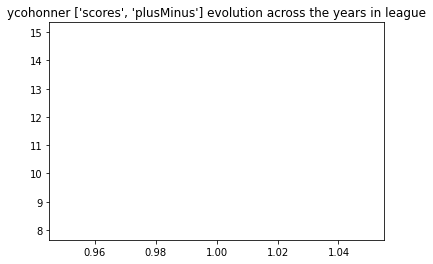

In [17]:
# 

def plot_player_stats_evolution(df, playerID, stat_columns):
    tmp = df[df['playerID'] == playerID]
    years = tmp['years_in_league']
    
    for col in stat_columns:
        stats = tmp[col]
        plt.plot(years, stats)
    plt.title(f'{playerID} {stat_columns} evolution across the years in league')
    plt.show()
    
# plot_player_stats_evolution(players_seasons_numbered, 'jhelton', ['scores'])
# plot_player_stats_evolution(players_seasons_numbered, 'jhelton', ['plusMinus'])
plot_player_stats_evolution(players_seasons_numbered, 'ycohonner', ['scores', 'plusMinus'])